In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
#import gensim
import scipy
import numpy
import json
import nltk
import sys
import csv
import os


In [6]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

In [9]:
print(os.listdir("C:/Users/sairam/Desktop/Ppractice"))

['sample_submission_stage_1.csv', 'test_stage_1.tsv.zip']


In [14]:
gendered_pronoun_df = pd.read_csv('C:/Users/sairam/Desktop/Ppractice/test_stage_1.tsv', delimiter='\t')

In [20]:
sample_submission_df = pd.read_csv('C:/Users/sairam/Desktop/Ppractice/sample_submission_stage_1.csv')

In [25]:
sample_submission_df.info
sample_submission_df.shape
gendered_pronoun_df.info
gendered_pronoun_df.shape

(2000, 9)

In [34]:
gendered_pronoun_df["num_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x).split()))

In [35]:
gendered_pronoun_df["num_words"].head(1)

0    74
Name: num_words, dtype: int64

In [37]:
gendered_pronoun_df["num_words"].max()

204

In [39]:
gendered_pronoun_df["num_words"].min()

16

In [47]:
gendered_pronoun_df["num_unique_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(set(str(x).split())))

In [ ]:
gendered_pronoun_df["num_chars"] = gendered_pronoun_df["Text"].apply(lambda x : len(str(x)))

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sairam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

In [61]:

gendered_pronoun_df["num_stopwords"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

In [66]:
gendered_pronoun_df["num_stopwords"].max()

88

In [69]:
import string
gendered_pronoun_df["num_punctuations"] = gendered_pronoun_df["Text"].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))

In [71]:
gendered_pronoun_df["num_punctuations"].max()

93

In [74]:
gendered_pronoun_df["num_wordsinupper"]= gendered_pronoun_df["Text"].apply(lambda x:len([w for w in str(x).split() if w.isupper()]))

In [76]:
gendered_pronoun_df["num_wordsinupper"].max()

11

In [78]:
Pronoun=gendered_pronoun_df["Pronoun"]

In [80]:
np.unique(Pronoun)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

In [82]:
gendered_pronoun_df["Pronoun_binary"] = gendered_pronoun_df["Pronoun"]

In [84]:
#gendered_pronoun_df["Pronoun_binary"]

In [87]:
gendered_pronoun_df.head(1)

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_wordsinupper,Pronoun_binary
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0,0r


In [86]:
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('He','0')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('he','0')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('she','1')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('She','1')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('His','2')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('his','2')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('him','3')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('her','4')
gendered_pronoun_df["Pronoun_binary"]=gendered_pronoun_df["Pronoun_binary"].str.replace('Her','4')

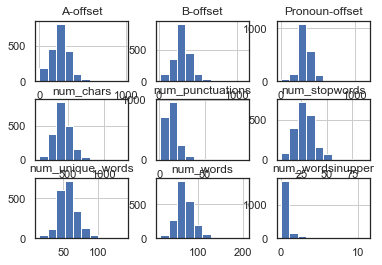

In [89]:
gendered_pronoun_df.hist();

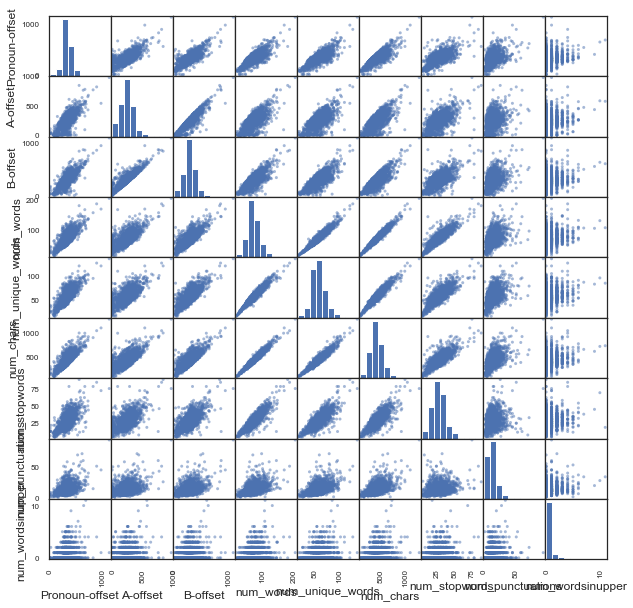

<Figure size 432x288 with 0 Axes>

In [90]:
pd.plotting.scatter_matrix(gendered_pronoun_df,figsize=(10,10))
plt.figure();

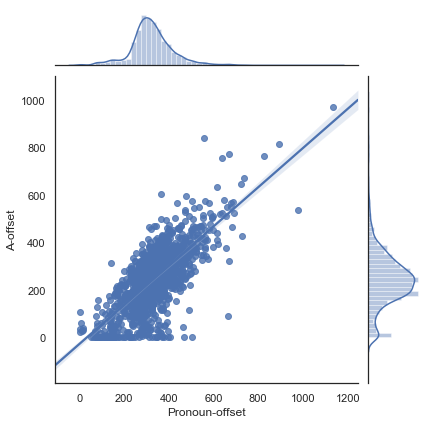

In [91]:
sns.jointplot(x='Pronoun-offset',y='A-offset' ,data=gendered_pronoun_df, kind='reg')

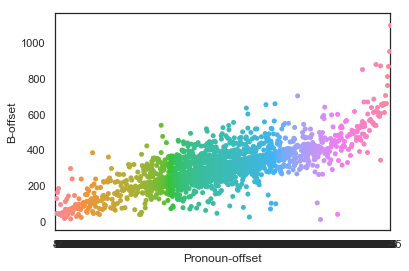

In [92]:
sns.swarmplot(x='Pronoun-offset',y='B-offset',data=gendered_pronoun_df)

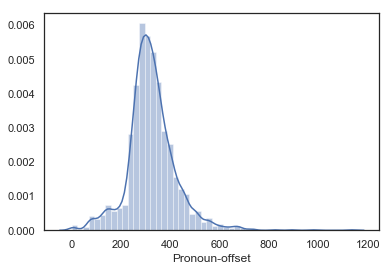

In [93]:
sns.distplot(gendered_pronoun_df["Pronoun-offset"])

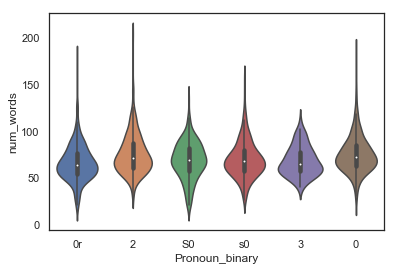

In [95]:
sns.violinplot(data=gendered_pronoun_df,x="Pronoun_binary", y="num_words")

In [96]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [97]:
our_text=gendered_pronoun_df.Text[0]

In [99]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sairam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [100]:
print(word_tokenize(our_text))

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


In [101]:
from nltk.tokenize import sent_tokenize, word_tokenize
print(sent_tokenize(our_text))

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


In [102]:
phrases = sent_tokenize(our_text)
words = word_tokenize(our_text)
print(phrases)

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


In [103]:
print(words)

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


In [104]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(our_text)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

['Zoe', 'Telford', '--', 'played', 'police', 'officer', 'girlfriend', 'Simon', ',', 'Maggie', '.', 'Dumped', 'Simon', 'final', 'episode', 'series', '1', ',', 'slept', 'Jenny', ',', 'seen', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'also', 'year', '11', 'pupil', 'Simon', "'s", 'class', '.', 'Dumped', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'would', "n't", 'sex', 'later', 'realised', 'due', 'catching', 'crabs', 'friend', 'Pauline', '.']


In [107]:
our_text=gendered_pronoun_df.Text[0]

In [109]:
our_text

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [110]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [111]:
ps = PorterStemmer()
 
for word in our_text:
    print(ps.stem(word))

Z
o
e
 
T
e
l
f
o
r
d
 
-
-
 
p
l
a
y
e
d
 
t
h
e
 
p
o
l
i
c
e
 
o
f
f
i
c
e
r
 
g
i
r
l
f
r
i
e
n
d
 
o
f
 
S
i
m
o
n
,
 
M
a
g
g
i
e
.
 
D
u
m
p
e
d
 
b
y
 
S
i
m
o
n
 
i
n
 
t
h
e
 
f
i
n
a
l
 
e
p
i
s
o
d
e
 
o
f
 
s
e
r
i
e
s
 
1
,
 
a
f
t
e
r
 
h
e
 
s
l
e
p
t
 
w
i
t
h
 
J
e
n
n
y
,
 
a
n
d
 
i
s
 
n
o
t
 
s
e
e
n
 
a
g
a
i
n
.
 
P
h
o
e
b
e
 
T
h
o
m
a
s
 
p
l
a
y
e
d
 
C
h
e
r
y
l
 
C
a
s
s
i
d
y
,
 
P
a
u
l
i
n
e
'
s
 
f
r
i
e
n
d
 
a
n
d
 
a
l
s
o
 
a
 
y
e
a
r
 
1
1
 
p
u
p
i
l
 
i
n
 
S
i
m
o
n
'
s
 
c
l
a
s
s
.
 
D
u
m
p
e
d
 
h
e
r
 
b
o
y
f
r
i
e
n
d
 
f
o
l
l
o
w
i
n
g
 
S
i
m
o
n
'
s
 
a
d
v
i
c
e
 
a
f
t
e
r
 
h
e
 
w
o
u
l
d
n
'
t
 
h
a
v
e
 
s
e
x
 
w
i
t
h
 
h
e
r
 
b
u
t
 
l
a
t
e
r
 
r
e
a
l
i
s
e
d
 
t
h
i
s
 
w
a
s
 
d
u
e
 
t
o
 
h
i
m
 
c
a
t
c
h
i
n
g
 
c
r
a
b
s
 
o
f
f
 
h
e
r
 
f
r
i
e
n
d
 
P
a
u
l
i
n
e
.


In [113]:
from nltk.tokenize import PunktSentenceTokenizer

In [115]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sairam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [116]:
sentences = nltk.sent_tokenize(our_text)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Zoe', 'NNP'), ('Telford', 'NNP'), ('--', ':'), ('played', 'VBD'), ('the', 'DT'), ('police', 'NN'), ('officer', 'NN'), ('girlfriend', 'NN'), ('of', 'IN'), ('Simon', 'NNP'), (',', ','), ('Maggie', 'NNP'), ('.', '.')]
[('Dumped', 'VBN'), ('by', 'IN'), ('Simon', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('final', 'JJ'), ('episode', 'NN'), ('of', 'IN'), ('series', 'NN'), ('1', 'CD'), (',', ','), ('after', 'IN'), ('he', 'PRP'), ('slept', 'VBD'), ('with', 'IN'), ('Jenny', 'NNP'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('not', 'RB'), ('seen', 'VBN'), ('again', 'RB'), ('.', '.')]
[('Phoebe', 'NNP'), ('Thomas', 'NNP'), ('played', 'VBD'), ('Cheryl', 'NNP'), ('Cassidy', 'NNP'), (',', ','), ('Pauline', 'NNP'), ("'s", 'POS'), ('friend', 'NN'), ('and', 'CC'), ('also', 'RB'), ('a', 'DT'), ('year', 'NN'), ('11', 'CD'), ('pupil', 'NN'), ('in', 'IN'), ('Simon', 'NNP'), ("'s", 'POS'), ('class', 'NN'), ('.', '.')]
[('Dumped', 'NNP'), ('her', 'PRP$'), ('boyfriend', 'NN'), ('following', 'VBG'), ('Simon', 'N

In [118]:
from nltk.corpus import state_union
#from nltk.tokenize import PunktSentenceTokenizer
 

sentences = nltk.sent_tokenize(our_text)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
 
for word in data: 
    if 'PRP' in word[1]: 
        print(word)

('he', 'PRP')
('her', 'PRP$')
('he', 'PRP')
('her', 'PRP$')
('him', 'PRP')
('her', 'PRP$')


In [119]:
from nltk.corpus import names

In [121]:
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\sairam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [122]:
names = ([(name, 'male') for name in names.words('male.txt')] + 
	 [(name, 'female') for name in names.words('female.txt')])

In [123]:
names

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male'),
 ('Abraham', 'male'),
 ('Abram', 'male'),
 ('Ace', 'male'),
 ('Adair', 'male'),
 ('Adam', 'male'),
 ('Adams', 'male'),
 ('Addie', 'male'),
 ('Adger', 'male'),
 ('Aditya', 'male'),
 ('Adlai', 'male'),
 ('Adnan', 'male'),
 ('Adolf', 'male'),
 ('Adolfo', 'male'),
 ('Adolph', 'male'),
 ('Adolphe', 'male'),
 ('Adolpho', 'male'),
 ('Adolphus', 'male'),
 ('Adrian', 'male'),
 ('Adrick', 'male'),
 ('Adrien', 'male'),
 ('Agamemnon', 'male'),
 ('Aguinaldo', 'male'),
 ('Aguste', 'male'),
 ('Agustin', 'male'),
 ('Aharon', 'male'),
 ('Ahmad', 'male'),
 ('Ahmed', 'male'),
 ('Ahmet', 'male'),
 ('Ajai', 'male'),
 ('Ajay', 'male'),
 ('Al', 'male'),
 ('Alaa', 'male'),
 ('Alain', 'male'),
 ('Alan', 'male

In [125]:
def gender_features(word): 
    return {'last_letter': word[-1]}

In [139]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def gender_features(word): 
    return {'last_letter': word[-1]} 
 
# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] + 
	 [(name, 'female') for name in names.words('female.txt')])
 
featuresets = [(gender_features(n), g) for (n,g) in names] 
train_set = featuresets
classifier = nltk.NaiveBayesClassifier.train(train_set) 
 
# Predict
print(classifier.classify(gender_features('see')))

female


In [140]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]


In [149]:
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [154]:
def word_feats(words):
    return dict([(word,True) for word in words])

In [155]:
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

In [156]:
train_set = positive_features + negative_features + neutral_vocab

In [158]:
train_set

[({'a': True, 'w': True, 'e': True, 's': True, 'o': True, 'm': True}, 'pos'),
 ({'o': True,
   'u': True,
   't': True,
   's': True,
   'a': True,
   'n': True,
   'd': True,
   'i': True,
   'g': True},
  'pos'),
 ({'f': True,
   'a': True,
   'n': True,
   't': True,
   's': True,
   'i': True,
   'c': True},
  'pos'),
 ({'t': True, 'e': True, 'r': True, 'i': True, 'f': True, 'c': True}, 'pos'),
 ({'g': True, 'o': True, 'd': True}, 'pos'),
 ({'n': True, 'i': True, 'c': True, 'e': True}, 'pos'),
 ({'g': True, 'r': True, 'e': True, 'a': True, 't': True}, 'pos'),
 ({':': True, ')': True}, 'pos'),
 ({'b': True, 'a': True, 'd': True}, 'neg'),
 ({'t': True, 'e': True, 'r': True, 'i': True, 'b': True, 'l': True}, 'neg'),
 ({'u': True, 's': True, 'e': True, 'l': True}, 'neg'),
 ({'h': True, 'a': True, 't': True, 'e': True}, 'neg'),
 ({':': True, '(': True}, 'neg'),
 'movie',
 'the',
 'sound',
 'was',
 'is',
 'actors',
 'did',
 'know',
 'words',
 'not']

In [160]:
#classifier = NaiveBayesClassifier.train(train_set)

In [162]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
##sentence = "Awesome movie, I liked it"
our_text = our_text.lower()
words = our_text.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.527027027027027
Negative: 0.25675675675675674


In [168]:
gendered_pronoun_df

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_wordsinupper,Pronoun_binary
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0,0r
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie,65,58,410,22,12,0,2
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...,95,71,536,39,16,0,2
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band),69,58,401,24,13,1,2
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera,112,80,660,43,18,1,S0
5,development-6,Sandra Collins is an American DJ. She got her ...,She,411,Collins,236,DJ,347,http://en.wikipedia.org/wiki/Sandra_Collins,81,64,488,31,13,4,S0
6,development-7,Reb Chaim Yaakov's wife is the sister of Rabbi...,his,273,Reb Asher,152,Akiva Eiger,253,http://en.wikipedia.org/wiki/Asher_Arieli,72,48,432,27,11,0,2
7,development-8,Slant Magazine's Sal Cinquemani viewed the alb...,his,337,Greg Kot,173,Robert Christgau,377,http://en.wikipedia.org/wiki/The_Truth_About_L...,71,60,451,26,21,0,2
8,development-9,Her father was an Englishman ``of rank and cul...,her,246,Mary Paine,255,Kelsey,267,http://en.wikipedia.org/wiki/Mary_S._Peake,53,42,302,23,13,0,0r
9,development-10,Shaftesbury's UK partners in the production of...,she,329,Christina Jennings,196,Kirstine Stewart,226,http://en.wikipedia.org/wiki/Murdoch_Mysteries,52,45,381,16,14,4,s0
